In [ ]:
#dont run skip to the third cell !!!!!!!!!!!!!!!!!!!!!

import cv2
import numpy as np

# Load the image
img = cv2.imread('XRAY_T09_E04.bmp')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply FCM segmentation with 3 clusters
num_clusters = 3
max_iterations = 200
epsilon = 0.01
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iterations, epsilon)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centers = cv2.kmeans(gray.reshape(-1, 1).astype(np.float32), num_clusters, None, criteria, 10, flags)

# Reshape the labels to the shape of the input image
labels = labels.reshape(img.shape[:2])

# Create a mask image for each cluster
masks = [labels == i for i in range(num_clusters)]

# Apply a different color to each cluster
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
colorful_masks = [cv2.cvtColor((masks[i] * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR) * colors[i] for i in range(num_clusters)]

# Combine the masks into a single image
result = np.zeros_like(img)
for colorful_mask in colorful_masks:
    result =( result+ colorful_mask).astype(np.uint8)

# Display the result
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#dont run skip to the third cell !!!!!!!!!!!!!!!!!!!!!
import numpy as np
import skimage.io as io
import skimage.color as color
import skfuzzy as fuzz

# Load the image and convert to grayscale
image = io.imread('XRAY_T09_E04.bmp')
image_gray = color.rgb2gray(image)

# Reshape the grayscale image into a 1D array
image_1d = image_gray.reshape((-1,))
print(image_1d.shape)
# Define the parameters for FCM
num_clusters = 3
fuzziness = 2.0
max_iter = 100
epsilon = 1e-5

# Apply FCM to the 1D array of grayscale values
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(image_1d, num_clusters, fuzziness, max_iter, epsilon, seed=0)

# Reshape the membership matrix back into the 2D shape of the original image
u_image = np.zeros((num_clusters, image.shape[0], image.shape[1]))
for i in range(num_clusters):
    u_image[i,:,:] = u[i,:].reshape((image.shape[0], image.shape[1]))

# Find the cluster with the highest membership value for each pixel
segmented_image = np.argmax(u_image, axis=0)

# Display the original and segmented images
io.imshow(image)
io.show()
io.imshow(segmented_image)
io.show()




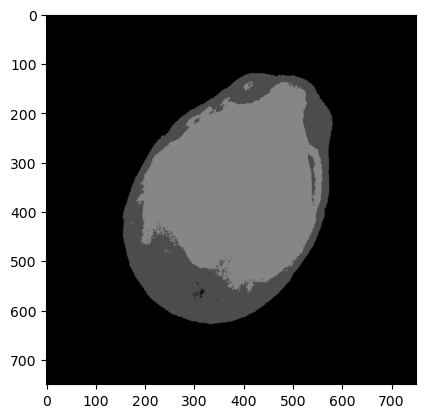

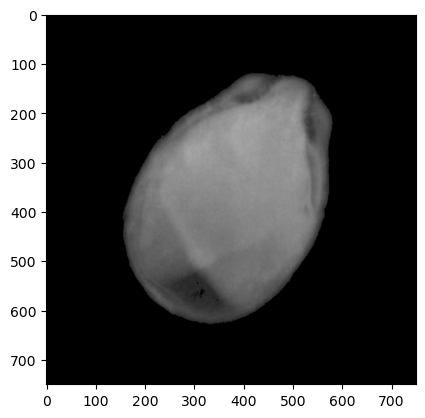

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# read the image
image = cv2.imread("XRAY_T09_E04.bmp")
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()
